In [1]:
!!dir

In [2]:
!!tree ..

['フォルダー パスの一覧:  ボリューム Windows',
 'ボリューム シリアル番号は CA67-50C9 です',
 'C:\\USERS\\TSK_SATO\\DESKTOP\\KAG',
 '├─.ipynb_checkpoints',
 '├─input',
 '│  └─audio',
 '│      └─audio',
 '│          ├─16000',
 '│          └─44100',
 '└─source',
 '    ├─.ipynb_checkpoints',
 '    └─__pycache__']

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys
import os
sys.path.insert(0, os.path.abspath('../input/'))
from utils import ESC50

train_splits = [1,2,3,4]
test_split = 5

shared_params = {'csv_path': '../input/esc50.csv',
                 'wav_dir': '../input/audio/audio',
                 'dest_dir': '../input/audio/audio/16000',
                 'audio_rate': 16000,
                 'only_ESC10': True,
                 'pad': 0,
                 'normalize': True}

train_gen = ESC50(folds=train_splits,
                  randomize=True,
                  strongAugment=True,
                  random_crop=True,
                  inputLength=2,
                  mix=True,
                  **shared_params).batch_gen(16)

test_gen = ESC50(folds=[test_split],
                 randomize=False,
                 strongAugment=False,
                 random_crop=False,
                 inputLength=4,
                 mix=False,
                 **shared_params).batch_gen(16)

X, Y = next(train_gen)
X.shape, Y.shape

((16, 32000, 1), (16, 10))

In [4]:
df = pd.read_csv('../input/esc50.csv')
classes = df[['target', 'category']].values.tolist()
classes = set(['{} {}'.format(c[0], c[1]) for c in classes])
classes = np.array([c.split(' ') for c in classes])
classes = {k: v for k, v in classes}

In [5]:
df.shape

(2000, 7)

In [6]:
classes

{'4': 'frog',
 '29': 'drinking_sipping',
 '20': 'crying_baby',
 '23': 'breathing',
 '18': 'toilet_flush',
 '21': 'sneezing',
 '15': 'water_drops',
 '43': 'car_horn',
 '19': 'thunderstorm',
 '10': 'rain',
 '49': 'hand_saw',
 '8': 'sheep',
 '28': 'snoring',
 '6': 'hen',
 '26': 'laughing',
 '13': 'crickets',
 '33': 'door_wood_creaks',
 '48': 'fireworks',
 '31': 'mouse_click',
 '37': 'clock_alarm',
 '45': 'train',
 '39': 'glass_breaking',
 '2': 'pig',
 '34': 'can_opening',
 '41': 'chainsaw',
 '11': 'sea_waves',
 '36': 'vacuum_cleaner',
 '1': 'rooster',
 '22': 'clapping',
 '17': 'pouring_water',
 '24': 'coughing',
 '38': 'clock_tick',
 '5': 'cat',
 '27': 'brushing_teeth',
 '47': 'airplane',
 '46': 'church_bells',
 '14': 'chirping_birds',
 '3': 'cow',
 '16': 'wind',
 '9': 'crow',
 '12': 'crackling_fire',
 '42': 'siren',
 '7': 'insects',
 '40': 'helicopter',
 '44': 'engine',
 '32': 'keyboard_typing',
 '25': 'footsteps',
 '35': 'washing_machine',
 '30': 'door_wood_knock',
 '0': 'dog'}

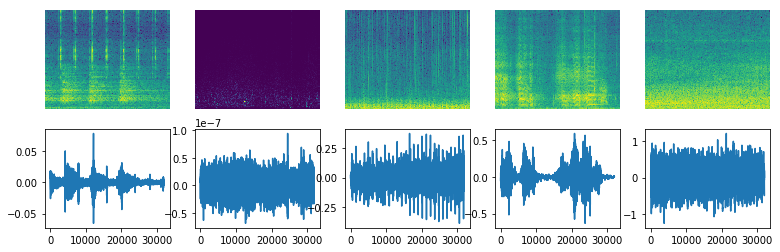

In [7]:
import scipy
from scipy import signal
import IPython.display as ipd

fig, axs = plt.subplots(2, 5, figsize=(13, 4))
for idx in range(5):
    i, j = int(idx / 5), int(idx % 5)
    x = X[idx]
    sampleFreqs, segmentTimes, sxx = signal.spectrogram(x[:, 0], 16000)
    axs[i*2][j].pcolormesh((len(segmentTimes) * segmentTimes / segmentTimes[-1]),
                         sampleFreqs,
                         10 * np.log10(sxx + 1e-15))
    #axs[i*2][j].set_title(classes[seen_classes[idx]])
    axs[i*2][j].set_axis_off()
    axs[i*2+1][j].plot(x)
    #axs[i*2+1][j].set_axis_off()
    
plt.show()

for idx in range(5):
    x = X[idx]
    ipd.display(ipd.Audio(x[:, 0], rate=16000))